In [1]:
# Proyecto Final de Computación Gráfica

In [2]:
!nvidia-smi


Thu Jul 24 20:55:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.7/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
# Instalar roboflow
!pip install roboflow

In [7]:
# CARGAR EL DATA DESDE "roboflow" USANDO UNA API-KEY
from roboflow import Roboflow
rf = Roboflow(api_key="API-KEY")
project = rf.workspace("yolov8-lmsek").project("person-detection-yolo-v8-0w975")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Person-Detection---YOLO-v8-1 in yolov8:: 100%|██████████| 11912/11912 [00:01<00:00, 6251.84it/s]


In [8]:
# ENTRENAMIENTO
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # Modelo nano como base

model.train(
    data=f"{dataset.location}/data.yaml",  # ruta al data.yaml
    epochs=20,
    imgsz=640,
    batch=16  # Puedes probar con 16 o bajarlo a 8 si hay error de memoria
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 182MB/s]

New https://pypi.org/project/ultralytics/8.3.169 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Person-Detection---YOLO-v8-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, opti

100%|██████████| 755k/755k [00:00<00:00, 37.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Person-Detection---YOLO-v8-1/train/labels... 4900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4900/4900 [00:02<00:00, 2209.75it/s]


train: New cache created: /content/Person-Detection---YOLO-v8-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Person-Detection---YOLO-v8-1/valid/labels... 700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<00:00, 1007.53it/s]


val: New cache created: /content/Person-Detection---YOLO-v8-1/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      1.416      1.759      1.399         10        640: 100%|██████████| 307/307 [01:34<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:08<00:00,  2.69it/s]

                   all        700       2942      0.556      0.406      0.413        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.22G       1.64      1.798       1.58          9        640: 100%|██████████| 307/307 [01:30<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.39it/s]

                   all        700       2942      0.418      0.367       0.35      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.3G      1.663      1.795      1.598         18        640: 100%|██████████| 307/307 [01:29<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  3.10it/s]

                   all        700       2942      0.503      0.407        0.4      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.32G      1.638      1.741      1.583         23        640: 100%|██████████| 307/307 [01:30<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.62it/s]

                   all        700       2942      0.536      0.428      0.437      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.36G      1.574      1.669       1.54         49        640: 100%|██████████| 307/307 [01:28<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  3.01it/s]


                   all        700       2942      0.529      0.433      0.443      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G      1.534      1.601      1.508         31        640: 100%|██████████| 307/307 [01:29<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.32it/s]

                   all        700       2942      0.562      0.459      0.476      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.43G      1.493       1.55      1.484         32        640: 100%|██████████| 307/307 [01:28<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.57it/s]

                   all        700       2942      0.621      0.473      0.527      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.31G      1.456      1.495      1.454         17        640: 100%|██████████| 307/307 [01:30<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  3.14it/s]

                   all        700       2942      0.651      0.472      0.536      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.41G      1.435      1.464      1.442         15        640: 100%|██████████| 307/307 [01:30<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.68it/s]

                   all        700       2942      0.645      0.488      0.556      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G      1.407      1.433      1.426         31        640: 100%|██████████| 307/307 [01:28<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.15it/s]

                   all        700       2942      0.681      0.511      0.576      0.319


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.31G      1.421      1.382      1.435         10        640: 100%|██████████| 307/307 [01:26<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  3.12it/s]

                   all        700       2942      0.652      0.512      0.568      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.31G      1.389      1.324      1.419         15        640: 100%|██████████| 307/307 [01:23<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.16it/s]

                   all        700       2942      0.689      0.512      0.586      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.29G      1.355       1.28      1.393          8        640: 100%|██████████| 307/307 [01:25<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.61it/s]

                   all        700       2942      0.684      0.523      0.596      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.23G      1.323      1.229      1.361         17        640: 100%|██████████| 307/307 [01:24<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  3.00it/s]

                   all        700       2942      0.642      0.554      0.599      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.31G      1.285      1.173      1.336         27        640: 100%|██████████| 307/307 [01:25<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.62it/s]

                   all        700       2942       0.69      0.543      0.613      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.31G      1.262      1.132      1.323          6        640: 100%|██████████| 307/307 [01:26<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.73it/s]

                   all        700       2942      0.718      0.537       0.62      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.27G      1.234      1.088      1.291         23        640: 100%|██████████| 307/307 [01:21<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.68it/s]

                   all        700       2942      0.708      0.547       0.62      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.2G        1.2      1.049      1.275         31        640: 100%|██████████| 307/307 [01:24<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.80it/s]

                   all        700       2942      0.737      0.545      0.633      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.31G      1.179      1.013       1.26          5        640: 100%|██████████| 307/307 [01:22<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.61it/s]

                   all        700       2942      0.728      0.558      0.639      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.28G       1.15      0.982      1.241          5        640: 100%|██████████| 307/307 [01:24<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:06<00:00,  3.55it/s]

                   all        700       2942      0.733      0.552      0.635      0.384



20 epochs completed in 0.529 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:09<00:00,  2.37it/s]


                   all        700       2942      0.733      0.552      0.635      0.384
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0ed11d1710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
# GUARDAR EL MODELO
from google.colab import drive
drive.mount('/content/drive')

# Luego lo copias al Drive
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/


Mounted at /content/drive


In [10]:
from google.colab import files
files.download('runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
from ultralytics import YOLO

# Cargar el modelo entrenado (no usamos 'model' para evitar conflictos)
detector = YOLO("runs/detect/train/weights/best.pt")

# Realizar inferencia en una imagen
results = detector("ejemplo0.png")  # Reemplaza con la ruta de tu imagen



image 1/1 /content/ejemplo0.png: 480x640 3 persons, 56.0ms
Speed: 4.9ms preprocess, 56.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)



image 1/1 /content/ejemplo0.png: 480x640 3 persons, 6.9ms
Speed: 3.1ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


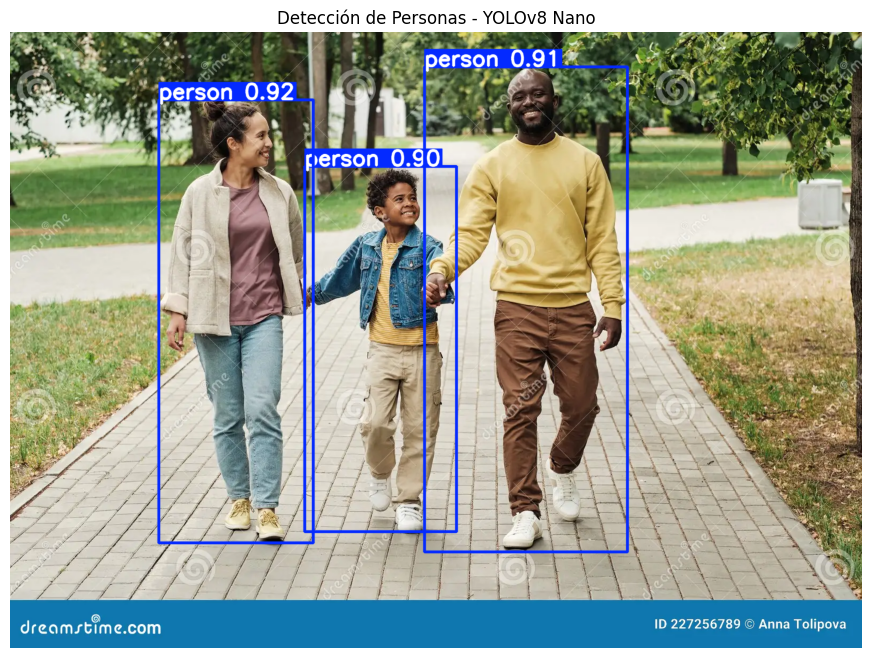

In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Cargar modelo
detector = YOLO("runs/detect/train/weights/best.pt")

# Hacer inferencia
results = detector("ejemplo0.png")

# Mostrar con matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(results[0].plot()[:, :, ::-1])  # Convertir BGR a RGB
plt.axis('off')
plt.title('Detección de Personas - YOLOv8 Nano')
plt.show()